In [1]:
import pandas as pd
import numpy as np

In [2]:
# http://datamx.io/dataset/delitos-del-fuero-comun
path = '/home/hadoop/Proyecto-Prophecy-Lizbeth/Practicas/fuerocomunmunicipios.csv'
df = pd.read_csv(path, encoding='latin', low_memory=False)
df.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740636 entries, 0 to 5740635
Data columns (total 10 columns):
state_code    int64
mun_code      int64
year          int64
month         int64
crime         object
category      object
type          object
subtype       object
count         float64
population    int64
dtypes: float64(1), int64(5), object(4)
memory usage: 438.0+ MB


In [4]:
df.shape

(5740636, 10)

In [5]:
df.shape[0]

5740636

In [6]:
df.shape[1]

10

In [7]:
df.columns.values.tolist()

['state_code',
 'mun_code',
 'year',
 'month',
 'crime',
 'category',
 'type',
 'subtype',
 'count',
 'population']

In [8]:
df.dtypes

state_code      int64
mun_code        int64
year            int64
month           int64
crime          object
category       object
type           object
subtype        object
count         float64
population      int64
dtype: object

In [9]:
df.isnull().any().any()

True

In [10]:
df.columns[df.isnull().any()].tolist()

['count']

In [11]:
len(pd.isnull(df).any(1).nonzero()[0].tolist())

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


3414383

In [12]:
pd.isnull(df).any(1).nonzero()[0].tolist()[0:5]

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


[941, 946, 2661, 2741, 2781]

In [13]:
df.describe()

,state_code,mun_code,year,month,count,population
count,5.740636e+06,5.740636e+06,5.740636e+06,5.740636e+06,2.326253e+06,5.740636e+06
mean,1.899102e+01,9.452533e+01,2.012263e+03,6.004696e+00,2.308071e+00,5.235490e+04
std,7.608523e+00,1.188232e+02,9.405606e-01,3.479479e+00,1.984210e+01,1.450224e+05
min,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,9.000000e+01
25%,1.400000e+01,2.100000e+01,2.012000e+03,3.000000e+00,0.000000e+00,5.329000e+03
50%,2.000000e+01,5.100000e+01,2.012000e+03,6.000000e+00,0.000000e+00,1.491100e+04
75%,2.400000e+01,1.090000e+02,2.013000e+03,9.000000e+00,0.000000e+00,3.693200e+04
max,3.200000e+01,5.700000e+02,2.014000e+03,1.200000e+01,3.778000e+03,1.830454e+06


In [14]:
df.loc[[0]]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483


In [15]:
df.loc[30:33]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
30,1,1,2013,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,47.0,842391
31,1,1,2013,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,48.0,843374
32,1,1,2013,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,39.0,844358
33,1,1,2013,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,845341


In [16]:
df.drop([0,24,51], axis=0).head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822


In [17]:
df.drop(df.index[1:5], axis=0).head(10)

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822
6,1,1,2011,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,817861
7,1,1,2011,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,818900
8,1,1,2011,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,36.0,819939
9,1,1,2011,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,820978
10,1,1,2011,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,31.0,822017
11,1,1,2011,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,27.0,823056
12,1,1,2012,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,50.0,824094
13,1,1,2012,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,52.0,825133


In [18]:
df[100:].head() #df.tail(-100) )

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
100,1,1,2012,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,832319
101,1,1,2012,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,833329
102,1,1,2012,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,834339
103,1,1,2012,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,835348
104,1,1,2013,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,836358


In [19]:
df.crime.values

array(['DELITOS PATRIMONIALES', 'DELITOS PATRIMONIALES',
       'DELITOS PATRIMONIALES', ..., 'ROBOS', 'ROBOS', 'ROBOS'],
      dtype=object)

In [20]:
df.crime.unique()

array(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES', 'HOMICIDIOS',
       'LESIONES', 'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)',
       'ROBOS'], dtype=object)

In [21]:
df.crime.value_counts()

ROBOS                               3218334
LESIONES                             695856
HOMICIDIOS                           695820
DELITOS PATRIMONIALES                608804
OTROS DELITOS                        347880
DELITOS SEXUALES                      86972
PRIV. DE LA LIBERTAD (SECUESTRO)      86970
Name: crime, dtype: int64

In [22]:
df.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,2326253,5740636
size,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
nunique,32,570,4,12,7,10,18,29,889,46404


In [23]:
df.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code    year   month   crime  category    type  \
state_code                                                               
1          count       29040   29040   29040   29040     29040   29040   
           size        29040   29040   29040   29040     29040   29040   
           nunique        11       4      12       7        10      18   
2          count       13200   13200   13200   13200     13200   13200   
           size        13200   13200   13200   13200     13200   13200   
           nunique         5       4      12       7        10      18   
3          count       13200   13200   13200   13200     13200   13200   
           size        13200   13200   13200   13200     13200   13200   
           nunique         5       4      12       7        10      18   
4          count       29040   29040   29040   29040     29040   29040   
           size        29040   29040   29040   29040     29040   29040   
           nunique        11       4      12       7        10      18   
5          count      100320  100320  100320  100320    100320  100320   
           size       100320  100320  100320  100320    100320  100320   
           nunique        38       4      12       7        10      18   
6          count       26400   26400   26400   26400     26400   26400   
           size        26400   26400   26400   26400     26400   26400   
           nunique        10       4      12       7        10      18   
7          count      311520  311520  311520  311520    311520  311520   
           size       311520  311520  311520  311520    311520  311520   
           nunique       118       4      12       7        10      18   
8          count      176880  176880  176880  176880    176880  176880   
           size       176880  176880  176880  176880    176880  176880   
           nunique        67       4      12       7        10      18   
9          count       42108   42108   42108   42108     42108   42108   
           size        42108   42108   42108   42108     42108   42108   
           nunique        16       4      12       7        10      18   
10         count      102960  102960  102960  102960    102960  102960   
           size       102960  102960  102960  102960    102960  102960   
           nunique        39       4      12       7        10      18   
...                      ...     ...     ...     ...       ...     ...   
23         count       26400   26400   26400   26400     26400   26400   
           size        26400   26400   26400   26400     26400   26400   
           nunique        10       4      12       7        10      18   
24         count      114114  114114  114114  114114    114114  114114   
           size       114114  114114  114114  114114    114114  114114   
           nunique        58       4      12       7        10      18   
25         count       47520   47520   47520   47520     47520   47520   
           size        47520   47520   47520   47520     47520   47520   
           nunique        18       4      12       7        10      18   
26         count      168828  168828  168828  168828    168828  168828   
           size       168828  168828  168828  168828    168828  168828   
           nunique        72       4      12       7        10      18   
27         count       43494   43494   43494   43494     43494   43494   
           size        43494   43494   43494   43494     43494   43494   
           nunique        17       4      12       7        10      18   
28         count      107844  107844  107844  107844    107844  107844   
           size       107844  107844  107844  107844    107844  107844   
           nunique        43       4      12       7        10      18   
29         count      154440  154440  154440  154440    154440  154440   
           size       154440  154440  154440  154440    154440  154440   
           nunique        60       4      12       7        10      18   
30         count      51

In [24]:
df.groupby('state_code').agg(['count', 'size', 'nunique'])

mun_code                    year                   month          \
              count    size nunique   count    size nunique   count    size   
state_code                                                                    
1             29040   29040      11   29040   29040       4   29040   29040   
2             13200   13200       5   13200   13200       4   13200   13200   
3             13200   13200       5   13200   13200       4   13200   13200   
4             29040   29040      11   29040   29040       4   29040   29040   
5            100320  100320      38  100320  100320       4  100320  100320   
6             26400   26400      10   26400   26400       4   26400   26400   
7            311520  311520     118  311520  311520       4  311520  311520   
8            176880  176880      67  176880  176880       4  176880  176880   
9             42108   42108      16   42108   42108       4   42108   42108   
10           102960  102960      39  102960  102960       4  102960  102960   
11           121440  121440      46  121440  121440       4  121440  121440   
12           213840  213840      81  213840  213840       4  213840  213840   
13           221760  221760      84  221760  221760       4  221760  221760   
14           268972  268972     125  268972  268972       4  268972  268972   
15           330000  330000     125  330000  330000       4  330000  330000   
16           298320  298320     113  298320  298320       4  298320  298320   
17            87120   87120      33   87120   87120       4   87120   87120   
18            52800   52800      20   52800   52800       4   52800   52800   
19           134508  134508      51  134508  134508       4  134508  134508   
20           981486  981486     570  981486  981486       4  981486  981486   
21           572880  572880     217  572880  572880       4  572880  572880   
22            47520   47520      18   47520   47520       4   47520   47520   
23            26400   26400      10   26400   26400       4   26400   26400   
24           114114  114114      58  114114  114114       4  114114  114114   
25            47520   47520      18   47520   47520       4   47520   47520   
26           168828  168828      72  168828  168828       4  168828  168828   
27            43494   43494      17   43494   43494       4   43494   43494   
28           107844  107844      43  107844  107844       4  107844  107844   
29           154440  154440      60  154440  154440       4  154440  154440   
30           515064  515064     212  515064  515064       4  515064  515064   
31           273042  273042     106  273042  273042       4  273042  273042   
32           114576  114576      58  114576  114576       4  114576  114576   

                     crime  ...    type subtype                   count  \
           nunique   count  ... nunique   count    size nunique   count   
state_code                  ...                                           
1               12   29040  ...      18   29040   29040      29   28904   
2               12   13200  ...      18   13200   13200      29    5392   
3               12   13200  ...      18   13200   13200      29   10200   
4               12   29040  ...      18   29040   29040      29   28973   
5               12  100320  ...      18  100320  100320      29   72473   
6               12   26400  ...      18   26400   26400      29   26400   
7               12  311520  ...      18  311520  311520      29   77854   
8               12  176880  ...      18  176880  176880      29   17750   
9               12   42108  ...      18   42108   42108      29   42072   
10              12  102960  ...      18  102960  102960      29    8578   
11              12  121440  ...      18  121440  121440      29  121436   
12              12  213840  ...      18  213840  213840      29  213837   
13              12  221760  ...      18  221760  221760      29   25553   
14              12  268972  ...      18  2689

In [25]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,NaN,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,NaN,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,2402


In [26]:
df.shape

(5740636, 10)

In [27]:
df_sample.shape

(287032, 10)

In [28]:
df_sample.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code   year  month  crime  category   type  subtype  \
state_code                                                                    
1          count        1457   1457   1457   1457      1457   1457     1457   
           size         1457   1457   1457   1457      1457   1457     1457   
           nunique        11      4     12      7        10     18       29   
2          count         655    655    655    655       655    655      655   
           size          655    655    655    655       655    655      655   
           nunique         5      4     12      7        10     18       29   
3          count         664    664    664    664       664    664      664   
           size          664    664    664    664       664    664      664   
           nunique         5      4     12      7        10     18       29   
4          count        1451   1451   1451   1451      1451   1451     1451   
           size         1451   1451   1451   1451      1451   1451     1451   
           nunique        11      4     12      7        10     18       29   
5          count        5076   5076   5076   5076      5076   5076     5076   
           size         5076   5076   5076   5076      5076   5076     5076   
           nunique        38      4     12      7        10     18       29   
6          count        1309   1309   1309   1309      1309   1309     1309   
           size         1309   1309   1309   1309      1309   1309     1309   
           nunique        10      4     12      7        10     18       29   
7          count       15358  15358  15358  15358     15358  15358    15358   
           size        15358  15358  15358  15358     15358  15358    15358   
           nunique       118      4     12      7        10     18       29   
8          count        8837   8837   8837   8837      8837   8837     8837   
           size         8837   8837   8837   8837      8837   8837     8837   
           nunique        67      4     12      7        10     18       29   
9          count        2121   2121   2121   2121      2121   2121     2121   
           size         2121   2121   2121   2121      2121   2121     2121   
           nunique        16      4     12      7        10     18       29   
10         count        5169   5169   5169   5169      5169   5169     5169   
           size         5169   5169   5169   5169      5169   5169     5169   
           nunique        39      4     12      7        10     18       29   
...                      ...    ...    ...    ...       ...    ...      ...   
23         count        1299   1299   1299   1299      1299   1299     1299   
           size         1299   1299   1299   1299      1299   1299     1299   
           nunique        10      4     12      7        10     18       29   
24         count        5644   5644   5644   5644      5644   5644     5644   
           size         5644   5644   5644   5644      5644   5644     5644   
           nunique        58      4     12      7        10     18       29   
25         count        2376   2376   2376   2376      2376   2376     2376   
           size         2376   2376   2376   2376      2376   2376     2376   
           nunique        18      4     12      7        10     18       29   
26         count        8393   8393   8393   8393      8393   8393     8393   
           size         8393   8393   8393   8393      8393   8393     8393   
           nunique        72      4     12      7        10     18       29   
27         count        2095   2095   2095   2095      2095   2095     2095   
           size         2095   2095   2095   2095      2095   2095     2095   
           nunique        17      4     12      7        10     18       29   
28         count        5490   5490   5490   5490      5490   5490     5490   
           size         5490   5490   5490   5490      5490   5490     5490   
           nunique        43      4     12      7        10     18    

In [29]:
df_dropped = df.dropna(subset=['count'])
df_dropped.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [30]:
df_dropped.shape

(2326253, 10)

In [31]:
df_copy = df.copy()
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [32]:
df_copy.shape

(5740636, 10)

In [33]:
df_dropped['count'].dtype

dtype('float64')

In [34]:
df_dropped['count'].mean()

2.30807096218683

In [35]:
df_copy['count'].fillna(value=np.round(df['count'].mean(),decimals=0), inplace=True)

In [36]:
df_copy.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
size,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
nunique,32,570,4,12,7,10,18,29,889,46404


In [37]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,2.0,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,2.0,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,2402


In [38]:
list(df.crime.unique())

['DELITOS PATRIMONIALES',
 'DELITOS SEXUALES',
 'HOMICIDIOS',
 'LESIONES',
 'OTROS DELITOS',
 'PRIV. DE LA LIBERTAD (SECUESTRO)',
 'ROBOS']

In [39]:
keys = list(df.crime.unique())
vals = range(1,8)
crime_map = dict(zip(keys, vals))
crime_map

{'DELITOS PATRIMONIALES': 1,
 'DELITOS SEXUALES': 2,
 'HOMICIDIOS': 3,
 'LESIONES': 4,
 'OTROS DELITOS': 5,
 'PRIV. DE LA LIBERTAD (SECUESTRO)': 6,
 'ROBOS': 7}

In [40]:
df_copy['crime_cat'] = df.crime.map(crime_map)
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,crime_cat
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,1
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,1
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,1
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,1
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,1


In [41]:
list(df_copy.crime_cat.unique())

[1, 2, 3, 4, 5, 6, 7]

In [42]:
from sklearn import preprocessing

df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['population'].values.reshape(-1,1))
df_normalized['population_norm'] = np_scaled.reshape(-1,1)
df_normalized.head()

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,state_code,mun_code,year,month,crime,category,type,subtype,count,population,population_norm
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,0.443200
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,0.443783
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,0.444367
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,0.444950
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,0.445533


In [43]:
df['state_code'].mean()

18.991024687856886

In [44]:
df['state_code'][df['month'] == 1].mean()

19.240224509512238

In [45]:
df.groupby(['state_code', 'year']).count()

mun_code   month   crime  category    type  subtype  count  \
state_code year                                                               
1          2011      8712    8712    8712      8712    8712     8712   8708   
           2012      8712    8712    8712      8712    8712     8712   8585   
           2013      8712    8712    8712      8712    8712     8712   8708   
           2014      2904    2904    2904      2904    2904     2904   2903   
2          2011      3960    3960    3960      3960    3960     3960   1500   
           2012      3960    3960    3960      3960    3960     3960   1739   
           2013      3960    3960    3960      3960    3960     3960   1512   
           2014      1320    1320    1320      1320    1320     1320    641   
3          2011      3960    3960    3960      3960    3960     3960   3960   
           2012      3960    3960    3960      3960    3960     3960   3960   
           2013      3960    3960    3960      3960    3960     3960   1660   
           2014      1320    1320    1320      1320    1320     1320    620   
4          2011      8712    8712    8712      8712    8712     8712   8646   
           2012      8712    8712    8712      8712    8712     8712   8712   
           2013      8712    8712    8712      8712    8712     8712   8711   
           2014      2904    2904    2904      2904    2904     2904   2904   
5          2011     30096   30096   30096     30096   30096    30096  21143   
           2012     30096   30096   30096     30096   30096    30096  20524   
           2013     30096   30096   30096     30096   30096    30096  23218   
           2014     10032   10032   10032     10032   10032    10032   7588   
6          2011      7920    7920    7920      7920    7920     7920   7920   
           2012      7920    7920    7920      7920    7920     7920   7920   
           2013      7920    7920    7920      7920    7920     7920   7920   
           2014      2640    2640    2640      2640    2640     2640   2640   
7          2011     93456   93456   93456     93456   93456    93456   7211   
           2012     93456   93456   93456     93456   93456    93456   6905   
           2013     93456   93456   93456     93456   93456    93456  53172   
           2014     31152   31152   31152     31152   31152    31152  10566   
8          2011     53064   53064   53064     53064   53064    53064   5636   
           2012     53064   53064   53064     53064   53064    53064   5243   
...                   ...     ...     ...       ...     ...      ...    ...   
25         2013     14256   14256   14256     14256   14256    14256   8856   
           2014      4752    4752    4752      4752    4752     4752   2952   
26         2011     56232   56232   56232     56232   56232    56232  20970   
           2012     57024   57024   57024     57024   57024    57024   4824   
           2013     36564   36564   36564     36564   36564    36564   3240   
           2014     19008   19008   19008     19008   19008    19008   3888   
27         2011     13464   13464   13464     13464   13464    13464  13464   
           2012     13464   13464   13464     13464   13464    13464  13464   
           2013     12078   12078   12078     12078   12078    12078  12075   
           2014      4488    4488    4488      4488    4488     4488   4487   
28         2011     34056   34056   34056     34056   34056    34056  19397   
           2012     34056   34056   34056     34056   34056    34056  22718   
           2013     28380   28380   28380     28380   28380    28380  19138   
           2014     11352   11352   11352     11352   11352    11352  11351   
29         2011     47520   47520   47520     47520   47520    47520  47520   
           2012     47520   47520   47520     47520   47520    47520  47519   
           2013     47520   47520   47520     47520   47520    47520  47520   
           2014     11880   11880   11880     11880   11880    1188

In [46]:
df.groupby(['state_code', 'year']).count()

mun_code   month   crime  category    type  subtype  count  \
state_code year                                                               
1          2011      8712    8712    8712      8712    8712     8712   8708   
           2012      8712    8712    8712      8712    8712     8712   8585   
           2013      8712    8712    8712      8712    8712     8712   8708   
           2014      2904    2904    2904      2904    2904     2904   2903   
2          2011      3960    3960    3960      3960    3960     3960   1500   
           2012      3960    3960    3960      3960    3960     3960   1739   
           2013      3960    3960    3960      3960    3960     3960   1512   
           2014      1320    1320    1320      1320    1320     1320    641   
3          2011      3960    3960    3960      3960    3960     3960   3960   
           2012      3960    3960    3960      3960    3960     3960   3960   
           2013      3960    3960    3960      3960    3960     3960   1660   
           2014      1320    1320    1320      1320    1320     1320    620   
4          2011      8712    8712    8712      8712    8712     8712   8646   
           2012      8712    8712    8712      8712    8712     8712   8712   
           2013      8712    8712    8712      8712    8712     8712   8711   
           2014      2904    2904    2904      2904    2904     2904   2904   
5          2011     30096   30096   30096     30096   30096    30096  21143   
           2012     30096   30096   30096     30096   30096    30096  20524   
           2013     30096   30096   30096     30096   30096    30096  23218   
           2014     10032   10032   10032     10032   10032    10032   7588   
6          2011      7920    7920    7920      7920    7920     7920   7920   
           2012      7920    7920    7920      7920    7920     7920   7920   
           2013      7920    7920    7920      7920    7920     7920   7920   
           2014      2640    2640    2640      2640    2640     2640   2640   
7          2011     93456   93456   93456     93456   93456    93456   7211   
           2012     93456   93456   93456     93456   93456    93456   6905   
           2013     93456   93456   93456     93456   93456    93456  53172   
           2014     31152   31152   31152     31152   31152    31152  10566   
8          2011     53064   53064   53064     53064   53064    53064   5636   
           2012     53064   53064   53064     53064   53064    53064   5243   
...                   ...     ...     ...       ...     ...      ...    ...   
25         2013     14256   14256   14256     14256   14256    14256   8856   
           2014      4752    4752    4752      4752    4752     4752   2952   
26         2011     56232   56232   56232     56232   56232    56232  20970   
           2012     57024   57024   57024     57024   57024    57024   4824   
           2013     36564   36564   36564     36564   36564    36564   3240   
           2014     19008   19008   19008     19008   19008    19008   3888   
27         2011     13464   13464   13464     13464   13464    13464  13464   
           2012     13464   13464   13464     13464   13464    13464  13464   
           2013     12078   12078   12078     12078   12078    12078  12075   
           2014      4488    4488    4488      4488    4488     4488   4487   
28         2011     34056   34056   34056     34056   34056    34056  19397   
           2012     34056   34056   34056     34056   34056    34056  22718   
           2013     28380   28380   28380     28380   28380    28380  19138   
           2014     11352   11352   11352     11352   11352    11352  11351   
29         2011     47520   47520   47520     47520   47520    47520  47520   
           2012     47520   47520   47520     47520   47520    47520  47519   
           2013     47520   47520   47520     47520   47520    47520  47520   
           2014     11880   11880   11880     11880   11880    1188

In [47]:
df.groupby(['category', 'year'])[['crime', 'mun_code']].count()

crime  mun_code
category                         year                  
DELITOS PATRIMONIALES            2011  151872    151872
                                 2012  203140    203140
                                 2013  195426    195426
                                 2014   58366     58366
DELITOS SEXUALES (VIOLACION)     2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8338      8338
HOMICIDIOS                       2011  173628    173628
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
LESIONES                         2011  173664    173664
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
OTROS DELITOS                    2011   86784     86784
                                 2012  116080    116080
                                 2013  111672    111672
                                 2014   33344     33344
PRIV. DE LA LIBERTAD (SECUESTRO) 2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO COMUN                       2011  303912    303912
                                 2012  406280    406280
                                 2013  390852    390852
                                 2014  116704    116704
ROBO DE GANADO (ABIGEATO)        2011   21708     21708
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO EN CARRETERAS               2011  217080    217080
                                 2012  290200    290200
                                 2013  279180    279180
                                 2014   83360     83360
ROBO EN INSTITUCIONES BANCARIAS  2011  260496    260496
                                 2012  348240    348240
                                 2013  335016    335016
                                 2014  100032    100032

In [48]:
# variant-1: multiple aggregations on single attribute
df_sample.groupby(['category', 'year'])[['crime', 'mun_code']].agg([np.sum, np.mean,
                                                              np.count_nonzero])

mun_code                          
                                           sum        mean count_nonzero
category                         year                                   
DELITOS PATRIMONIALES            2011   406307   54.647882          7435
                                 2012  1113769  108.809007         10236
                                 2013  1038856  107.720448          9644
                                 2014   297999  104.304865          2857
DELITOS SEXUALES (VIOLACION)     2011    61266   54.701786          1120
                                 2012   154505  105.752909          1461
                                 2013   151283  108.136526          1399
                                 2014    46499  106.162100           438
HOMICIDIOS                       2011   478818   54.659589          8760
                                 2012  1278098  109.491819         11673
                                 2013  1184793  106.354847         11140
                                 2014   363750  106.577791          3413
LESIONES                         2011   485332   55.396873          8761
                                 2012  1262387  107.693824         11722
                                 2013  1189147  107.178639         11095
                                 2014   341930  101.493025          3369
OTROS DELITOS                    2011   236834   55.412728          4274
                                 2012   624465  109.459246          5705
                                 2013   587479  104.850794          5603
                                 2014   172107  100.765222          1708
PRIV. DE LA LIBERTAD (SECUESTRO) 2011    61983   56.348182          1100
                                 2012   159151  109.986869          1447
                                 2013   150106  107.757358          1393
                                 2014    44405  112.703046           394
ROBO COMUN                       2011   835459   55.098529         15163
                                 2012  2200746  109.266968         20141
                                 2013  2101792  106.787522         19682
                                 2014   580667   99.856750          5815
ROBO DE GANADO (ABIGEATO)        2011    55766   54.036822          1032
                                 2012   157454  107.697674          1462
                                 2013   148875  107.724313          1382
                                 2014    43831  106.128329           413
ROBO EN CARRETERAS               2011   589858   54.824612         10759
                                 2012  1603754  109.898856         14593
                                 2013  1490269  106.913624         13939
                                 2014   428213  102.738244          4168
ROBO EN INSTITUCIONES BANCARIAS  2011   726232   55.513836         13082
                                 2012  1906508  110.081875         17319
                                 2013  1796466  106.824404         16817
                                 2014   531412  103.831966          5118

In [49]:
# variant-2: different aggregation functions for each attribute
df_sample.groupby(['category', 'year']).agg({'month':np.mean,'population':np.max})

month  population
category                         year                      
DELITOS PATRIMONIALES            2011  6.526833     1830454
                                 2012  6.426631     1819980
                                 2013  6.234965     1813631
                                 2014  2.341267     1807970
DELITOS SEXUALES (VIOLACION)     2011  6.653571     1583012
                                 2012  6.475702     1716871
                                 2013  6.228735     1728980
                                 2014  2.260274     1807532
HOMICIDIOS                       2011  6.491553     1826952
                                 2012  6.507496     1820658
                                 2013  6.242370     1811473
                                 2014  2.332552     1739371
LESIONES                         2011  6.534870     1827828
                                 2012  6.512541     1820658
                                 2013  6.271834     1814171
                                 2014  2.321164     1739371
OTROS DELITOS                    2011  6.535798     1829579
                                 2012  6.469413     1814710
                                 2013  6.264680     1812552
                                 2014  2.369438     1807970
PRIV. DE LA LIBERTAD (SECUESTRO) 2011  6.474545     1706078
                                 2012  6.532827     1816329
                                 2013  6.196698     1663838
                                 2014  2.230964     1170136
ROBO COMUN                       2011  6.499637     1829579
                                 2012  6.482846     1821335
                                 2013  6.246520     1814171
                                 2014  2.324506     1808408
ROBO DE GANADO (ABIGEATO)        2011  6.393411     1824045
                                 2012  6.578659     1497537
                                 2013  6.295224     1810159
                                 2014  2.329298     1162120
ROBO EN CARRETERAS               2011  6.458035     1827828
                                 2012  6.488385     1819303
                                 2013  6.214363     1812013
                                 2014  2.346689     1808408
ROBO EN INSTITUCIONES BANCARIAS  2011  6.482036     1830454
                                 2012  6.495352     1820658
                                 2013  6.269192     1813092
                                 2014  2.298163     1807970

In [50]:
# variant-3
df_sample.groupby(['category', 'year']).agg({'population':{'total_population':np.sum,
                                                               'mean_population':np.mean,
                                                               'variance_population':np.std},
                                                               'month':np.mean})

/usr/local/lib/python3.5/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


month      population  \
                                           mean mean_population   
category                         year                             
DELITOS PATRIMONIALES            2011  6.526833    61036.743779   
                                 2012  6.426631    46990.731731   
                                 2013  6.234965    49296.555682   
                                 2014  2.341267    53079.187609   
DELITOS SEXUALES (VIOLACION)     2011  6.653571    61563.836607   
                                 2012  6.475702    51888.859001   
                                 2013  6.228735    46240.295926   
                                 2014  2.260274    52676.178082   
HOMICIDIOS                       2011  6.491553    60538.990183   
                                 2012  6.507496    48208.787458   
                                 2013  6.242370    50837.135817   
                                 2014  2.332552    54443.685321   
LESIONES                         2011  6.534870    61949.441730   
                                 2012  6.512541    47899.771455   
                                 2013  6.271834    50124.371609   
                                 2014  2.321164    48006.093203   
OTROS DELITOS                    2011  6.535798    62485.021759   
                                 2012  6.469413    47772.478703   
                                 2013  6.264680    51865.010173   
                                 2014  2.369438    55291.993560   
PRIV. DE LA LIBERTAD (SECUESTRO) 2011  6.474545    62393.830909   
                                 2012  6.532827    52208.463027   
                                 2013  6.196698    50299.225413   
                                 2014  2.230964    43541.616751   
ROBO COMUN                       2011  6.499637    59989.751039   
                                 2012  6.482846    48231.500372   
                                 2013  6.246520    50523.537039   
                                 2014  2.324506    52663.051419   
ROBO DE GANADO (ABIGEATO)        2011  6.393411    60216.459302   
                                 2012  6.578659    49359.632011   
                                 2013  6.295224    45677.213459   
                                 2014  2.329298    41311.815981   
ROBO EN CARRETERAS               2011  6.458035    60400.103634   
                                 2012  6.488385    48618.713630   
                                 2013  6.214363    47751.151733   
                                 2014  2.346689    51638.725768   
ROBO EN INSTITUCIONES BANCARIAS  2011  6.482036    60290.893824   
                                 2012  6.495352    47120.103181   
                                 2013  6.269192    51051.528275   
                                 2014  2.298163    52565.791129   

                                                                            
                                      variance_population total_population  
category                         year                                       
DELITOS PATRIMONIALES            2011       153622.547326        453808190  
                                 2012       137229.811508        480997130  
                                 2013       140482.164855        475415983  
                                 2014       144133.427684        151647239  
DELITOS SEXUALES (VIOLACION)     2011       158448.176942         68951497  
                                 2012       155774.108605         75809623  
                                 2013       133834.948946         64690174  
                                 2014       169429.880751         23072166  
HOMICIDIOS                       2011       150290.042398        530321554  
                                 2012       140805.469288        562741176  
                                 2013       143484.980859        566325693  
                                 2014       152894.956959        185816298  
LESIO

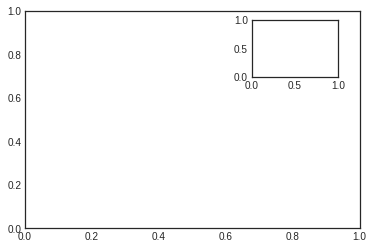

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

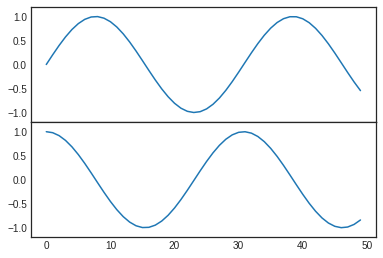

In [52]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

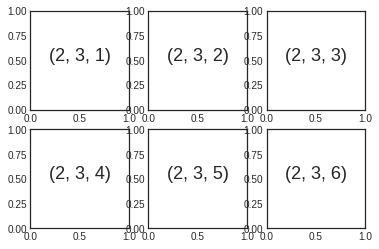

In [53]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

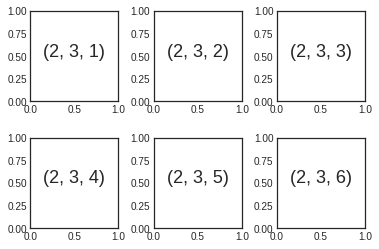

In [54]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

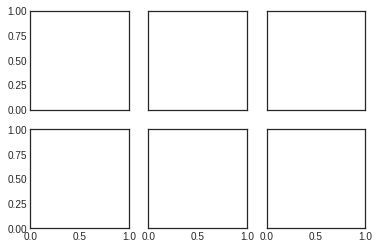

In [55]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

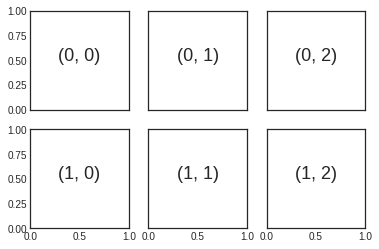

In [56]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

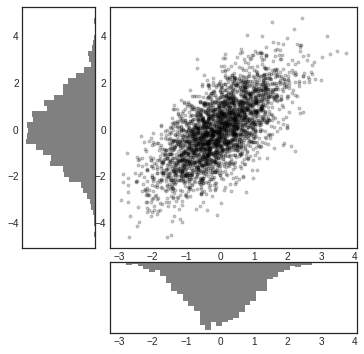

In [57]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

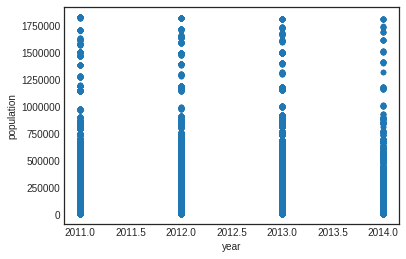

In [58]:
#figure.savefig('.../.jpeg')
df_sample['year'] = df_sample['year'].astype('int64')

df_sample.plot(kind='scatter',x='year',y='population')

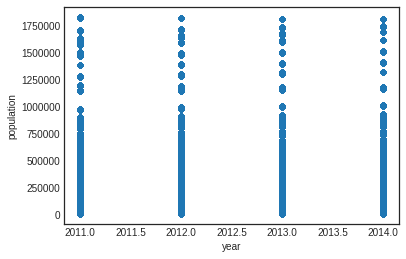

In [59]:
#figure.savefig('.../.jpeg')

df_copy.plot(kind='scatter',x='year',y='population')

Me intereso la manera en que puedes ordenar de acuerdo a lo que necesitas tener más especifico para empezar a tener visión de los datos que se están manejando como en la creación de tablas o excluyendo indíces y cuando hace un resumen de cada fila específica. La libreria de Pandas se me hace muy visual para manejar los datos aunque un poco tardada en procesar.
La libreria Matplotlib hace que de vida a esos datos, ya que al crear las gráficas te da una respuesta para validar la hipotésis y también te da una visualización de histogramas, para obtener una idea mucho más detallada de lo que nos puede servir para realizar nuestros modelos de predicción, esta libreria se me hace muy importante ya que se puede jugar con ella y con datos especificos.

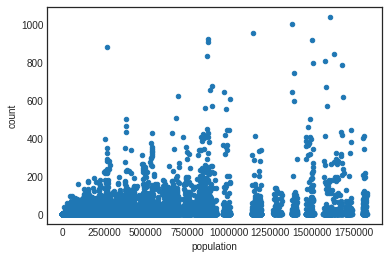

In [63]:
#figure.savefig('.../.jpeg')

df_sample.plot(kind='scatter',x='population',y='count')

In [ ]:
plt.hist(df_sample['crime'])
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.title('Frequency of Crime')

In [ ]:
plt.hist(df_sample['crime_cat'])
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.title('Frequency of Crime')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()
ax0.hist(df_sample['crime_cat'])
ax1.hist(df_sample['crime'])
plt.show()

In [ ]:
#plt.boxplot(df_sample['crime_cat'])
plt.boxplot(df_sample['month'], showmeans=True, meanline=True)
plt.ylabel('Crime categories')
plt.title('Box Plot of Crime categories')